<h1 align="center"><font color='green'>Data Preprocessing</font></h1>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Employee.csv')

In [3]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [4]:
#dataframe.info() :This summary is useful for quickly understanding the structure of your dataset and 
#identifying any potential issues such as missing values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


<h3 align="center"> <font color='blue'>1.Explore the data.</font></h3>

In [6]:
#columns
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [7]:
print("First few rows of the DataFrame:")
print(df.head())

First few rows of the DataFrame:
   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0


In [8]:
print("\nData types of columns:")
print(df.dtypes)


Data types of columns:
Company     object
Age        float64
Salary     float64
Place       object
Country     object
Gender       int64
dtype: object


In [9]:
#  Rename column 
# we want to rename column 'Place' to 'State'
df = df.rename(columns={'Place': 'State'})


In [10]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Company     8
Age        18
Salary     24
State      14
Country     0
Gender      0
dtype: int64


There are null values for company,age,salary and place features.

In [11]:
#listing unique values in each feature and finding its length
print("\nUnique values in each feature and their lengths:")
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values} (length: {len(unique_values)})")


Unique values in each feature and their lengths:
Company: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt'] (length: 7)
Age: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.] (length: 30)
Salary: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.] (length: 41)
State: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'] (length: 12)
Country: ['India'] (length: 1)
Gender: [0 1] (length: 2)


In [12]:
#statistical summary

In [13]:
print("\nStatistical Summary:")
df.describe()


Statistical Summary:


,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


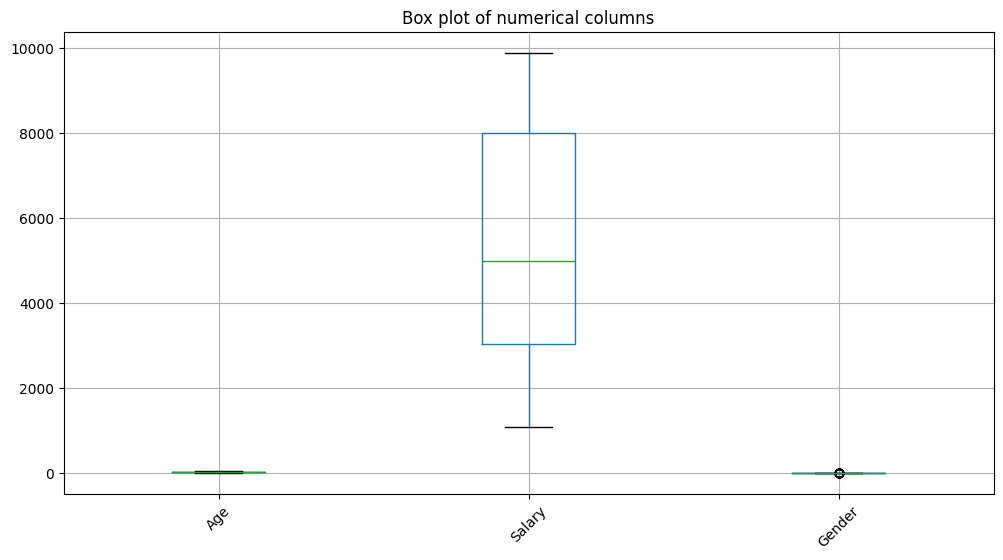

In [14]:
#checking the presence of outliers by plotting .
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title('Box plot of numerical columns')
plt.xticks(rotation=45)
plt.show()

From the above plot it is clear that there is no noticable outliers present in either of the numerical columns.


<h3 align="center"> <font color='blue'>2.Data Cleaning.</font></h3>


In [15]:
df['Age'].isnull().value_counts()

Age
False    130
True      18
Name: count, dtype: int64

#Total 18 null values

In [16]:
# Check if 'age' column contains any zeros
if (df['Age'] == 0).any():
    print("The 'age' column contains zeros.")
else:
    print("The 'age' column does not contain zeros.")

The 'age' column contains zeros.


In [17]:
# Count occurrences of the value 0 in the 'Age' column
value_counts =( df['Age']==0).value_counts()

# Display the counts
print(value_counts)

Age
False    142
True       6
Name: count, dtype: int64


In [18]:
#Replacing 0 with NaN 
df['Age'] = df['Age'].replace(0, float('NaN'))

There are 6 zero entries in Age column

In [19]:
df[df['Age'].isnull()]

,Company,Age,Salary,State,Country,Gender
5,Infosys,NaN,5000.0,Calcutta,India,0
6,TCS,NaN,6000.0,Chennai,India,1
23,Infosys,NaN,5835.0,Cochin,India,0
24,TCS,NaN,7084.0,Chennai,India,1
41,Infosys,NaN,5000.0,NaN,India,0
42,TCS,NaN,6000.0,NaN,India,0
59,Infosys,NaN,5835.0,Mumbai,India,0
60,TCS,NaN,7084.0,Calcutta,India,0
77,Infosys,NaN,5000.0,Hyderabad,India,0
78,TCS,NaN,6000.0,Calcutta,India,0


Above are the rows corresponding to the null value under 'Age' column . SImilarly we can find the others too.

In [20]:
#filling the missing values with mean.
for column in df.columns:
    if df[column].dtype != object:  # Exclude object type columns (non-numeric)
        mean_value = df[column].mean()
        df[column] = df[column].fillna(mean_value)

In [21]:
#check the null values again
df.isnull().sum()

Company     8
Age         0
Salary      0
State      14
Country     0
Gender      0
dtype: int64

null values now exist only in place  and Company column

In [34]:
#removing the null values from the categorical column with mode.
mode_value=df['State'].mode()[0] # the mode method may return multiple values if there are ties, we use [0] to select the first mode value.

In [35]:
#fill the null values
df['State'].fillna(mode_value,inplace=True)

In [36]:
df.isnull().sum()

Company    8
Age        0
Salary     0
State      0
Country    0
Gender     0
dtype: int64

In [22]:
# Check for duplicate rows
duplicates = df[df.duplicated()]

# Display duplicate rows, if any
print("Duplicate rows:")
print(duplicates)

#Duplicate rows:
#     Company   Age  Salary     Place Country  Gender
#84       CTS  43.0  5000.0    Mumbai   India       0
#130      TCS  21.0  4824.0    Mumbai   India       0
#131  Infosys  33.0  5835.0    Mumbai   India       0
#144  Infosys  22.0  8787.0  Calcutta   India       1

#dropping duplicates and resetting the index
df=df.drop_duplicates()

df=df.reset_index(drop=True)


Duplicate rows:
     Company        Age       Salary     State Country  Gender
84       CTS  43.000000  5312.467742    Mumbai   India       0
130      TCS  21.000000  4824.000000    Mumbai   India       0
131  Infosys  31.959677  5835.000000    Mumbai   India       0
144  Infosys  22.000000  8787.000000  Calcutta   India       1


<h3 align="center"> <font color='blue'>3.Analysing Data.</font></h3>

In [23]:
#Extracting data with age >40 and salary>5000
filtered_data=df[(df['Age']>40) & (df['Salary']>5000)]

In [24]:
import matplotlib.pyplot as plt

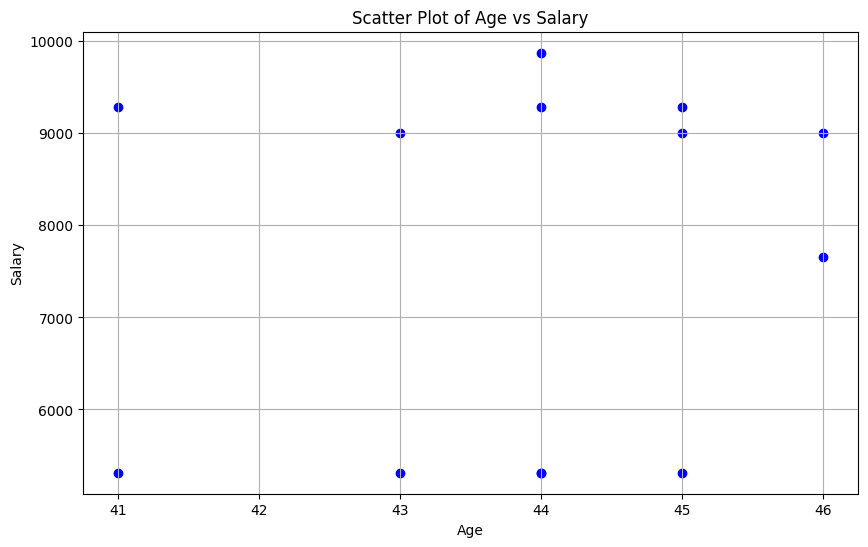

In [25]:
#visualizing age and salary using scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Age'], filtered_data['Salary'], color='blue')
plt.title('Scatter Plot of Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

Here , we can see at the age of 44 the salary is high and at 46 salary is low.
so as the age is between 42-45 high salary

In [26]:
#counting the number of employees in each place and visualising it.
employee_count=df['State'].value_counts()

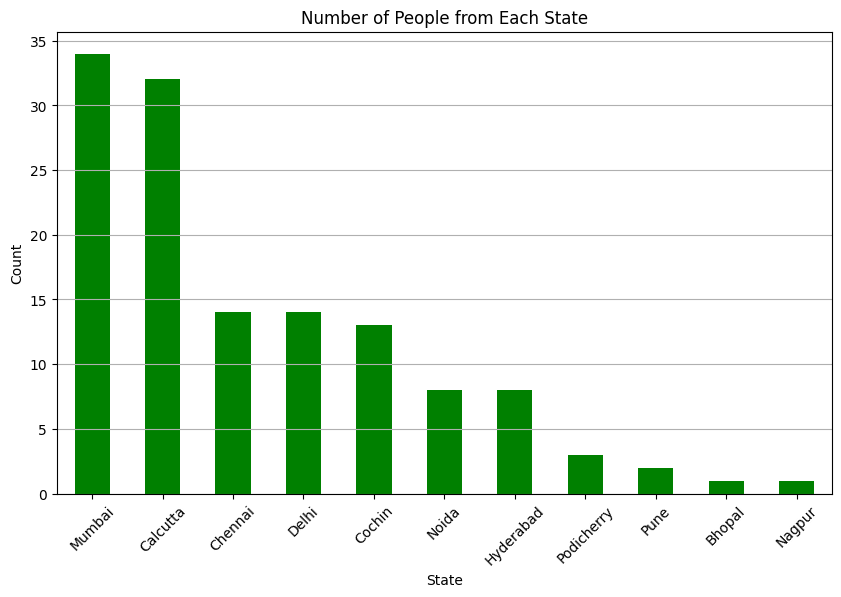

In [27]:
employee_count.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Number of People from Each State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

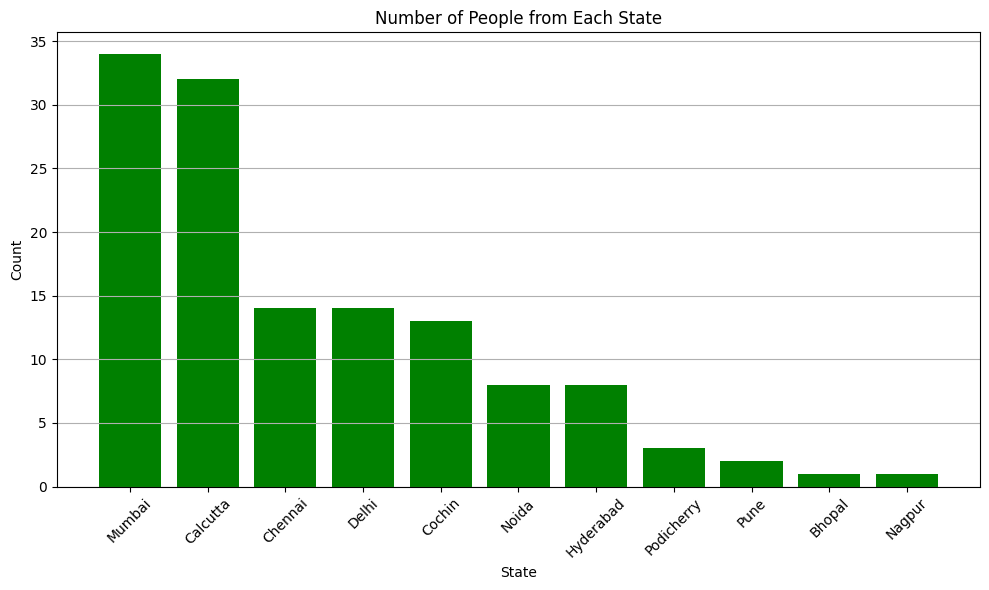

In [28]:
#or you can plot using plt.bar()

plt.figure(figsize=(10, 6))
plt.bar(employee_count.index, employee_count, color='green')
plt.title('Number of People from Each State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines on y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Encoding Categorical Variable

In [29]:
import numpy as np

In [30]:
df

,Company,Age,Salary,State,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,0
140,TCS,33.0,9024.000000,Calcutta,India,1
141,Infosys,44.0,4034.000000,Delhi,India,1
142,TCS,33.0,5034.000000,Mumbai,India,1


Here the categorical variables are coming under 'Company','Place','Country'.
We have to convert those categorical variables into numerical variables

In [37]:
#1. One_hot_encoding using get dummies
df_one_hot_encoding=pd.get_dummies(data=df,columns=["Company","State","Country"])
df_one_hot_encoding

,Age,Salary,Gender,Company_CTS,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,State_Bhopal,...,State_Chennai,State_Cochin,State_Delhi,State_Hyderabad,State_Mumbai,State_Nagpur,State_Noida,State_Podicherry,State_Pune,Country_India
0,20.0,5312.467742,0,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
1,30.0,5312.467742,0,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,35.0,2300.000000,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,40.0,3000.000000,0,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,23.0,4000.000000,0,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,22.0,8202.000000,0,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
140,33.0,9024.000000,1,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
141,44.0,4034.000000,1,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
142,33.0,5034.000000,1,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True


In [38]:
#using sklearn module
pip install scikit-learn

SyntaxError: invalid syntax (760289294.py, line 2)

In [39]:
pip show scikit-learn

Name: scikit-learnNote: you may need to restart the kernel to use updated packages.

Version: 1.4.1.post1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\naufg\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


In [40]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [43]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df

In [ ]:
#coulmns to encode
cols_to_encode=['Company','State','Country']
#line initializes an empty list named new_encoded_cols_names to store the new column names after encoding.
new_encoded_cols_name=[]

#creating a list of new column names
for col in cols_to_encode:
   new_encoded_cols_name += [f"is_{category}" for category in df[col].unique().tolist()]


print(new_encoded_cols_name)
#['is_TCS', 'is_Infosys', 'is_CTS', 'is_nan', 'is_Tata Consultancy Services', 'is_Congnizant', 'is_Infosys Pvt Lmt', 'is_Chennai', 'is_Mumbai', 'is_Calcutta', 'is_Delhi', 'is_Podicherry', 'is_Cochin', 'is_nan', 'is_Noida', 'is_Hyderabad', 'is_Bhopal', 'is_Nagpur', 'is_Pune', 'is_India']

# Inititalize and fit One Hot Encoder class from sklearn
#initializes an instance of the OneHotEncoder class with parameters sparse=False and handle_unknown='ignore'.
one_hot_encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

# fits the OneHotEncoder to the specified columns in the DataFrame df and transforms them into a one-hot encoded representation.
encoded_cols = one_hot_encoder.fit_transform(df[cols_to_encode])

# As the output of the above transformer would be a sparse matrix, we need to convert it back to Pandas dataframe
#converts the encoded matrix (encoded_cols) into a pandas DataFrame with the specified column names (new_encoded_cols_names).
df_encoded = pd.DataFrame(encoded_cols, columns = new_encoded_cols_names)

#joins the encoded DataFrame (df_encoded) with the original DataFrame (df) along the index axis.
df_one_hot_encoded = df.join(df_encoded)

#prints the resulting DataFrame df_one_hot_encoded, which contains the original columns along with the new one-hot encoded columns.
print(df_one_hot_encoded)


In scikit-learn version 0.24.0 and later, the sparse argument has been deprecated, and the sparse_output argument should be used instead.

In [44]:
#coulmns to encode
cols_to_encode=['Company','State']
#line initializes an empty list named new_encoded_cols_names to store the new column names after encoding.
new_encoded_cols_name=[]

#creating a list of new column names
for col in cols_to_encode:
   new_encoded_cols_name += [f"is_{category}" for category in df[col].unique().tolist()]


print(new_encoded_cols_name)
#['is_TCS', 'is_Infosys', 'is_CTS', 'is_nan', 'is_Tata Consultancy Services', 'is_Congnizant', 'is_Infosys Pvt Lmt', 'is_Chennai', 'is_Mumbai', 'is_Calcutta', 'is_Delhi', 'is_Podicherry', 'is_Cochin', 'is_nan', 'is_Noida', 'is_Hyderabad', 'is_Bhopal', 'is_Nagpur', 'is_Pune', 'is_India']

# Inititalize and fit One Hot Encoder class from sklearn
#initializes an instance of the OneHotEncoder class with parameters sparse=False and handle_unknown='ignore'.
one_hot_encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')

# fits the OneHotEncoder to the specified columns in the DataFrame df and transforms them into a one-hot encoded representation.
encoded_cols = one_hot_encoder.fit_transform(df[cols_to_encode])

# As the output of the above transformer would be a sparse matrix, we need to convert it back to Pandas dataframe
#converts the encoded matrix (encoded_cols) into a pandas DataFrame with the specified column names (new_encoded_cols_names).
df_encoded = pd.DataFrame(encoded_cols, columns = new_encoded_cols_name)

#joins the encoded DataFrame (df_encoded) with the original DataFrame (df) along the index axis.
df_one_hot_encoded = df.join(df_encoded)

#prints the resulting DataFrame df_one_hot_encoded, which contains the original columns along with the new one-hot encoded columns.
print(df_one_hot_encoded)

['is_TCS', 'is_Infosys', 'is_CTS', 'is_nan', 'is_Tata Consultancy Services', 'is_Congnizant', 'is_Infosys Pvt Lmt', 'is_Chennai', 'is_Mumbai', 'is_Calcutta', 'is_Delhi', 'is_Podicherry', 'is_Cochin', 'is_Noida', 'is_Hyderabad', 'is_Bhopal', 'is_Nagpur', 'is_Pune']
             Company   Age       Salary     State Country  Gender  is_TCS  \
0                TCS  20.0  5312.467742   Chennai   India       0     0.0   
1            Infosys  30.0  5312.467742    Mumbai   India       0     0.0   
2                TCS  35.0  2300.000000  Calcutta   India       0     0.0   
3            Infosys  40.0  3000.000000     Delhi   India       0     0.0   
4                TCS  23.0  4000.000000    Mumbai   India       0     0.0   
..               ...   ...          ...       ...     ...     ...     ...   
139  Infosys Pvt Lmt  22.0  8202.000000    Mumbai   India       0     0.0   
140              TCS  33.0  9024.000000  Calcutta   India       1     0.0   
141          Infosys  44.0  4034.000000   

In [45]:
#label encoding using sklearn 

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
#This line creates an instance of the LabelEncoder class, which will be used to encode categorical variables.

for i in df:
    df[i] = label_encoder.fit_transform(df[i])
#This loop iterates over each column (i) in the DataFrame df. For each column,
#it applies the fit_transform method of the LabelEncoder object to encode the column's values with integer labels.
#The original values in the column are replaced with their encoded integer labels.

In [46]:
df.State.value_counts()

State
6     48
1     32
2     14
4     14
3     13
8      8
5      8
9      3
10     2
0      1
7      1
Name: count, dtype: int64

In [47]:
df.Company.value_counts()

Company
4    52
2    43
0    35
6     8
5     2
1     2
3     2
Name: count, dtype: int64

After running this code, each categorical variable in the DataFrame df will be replaced with its corresponding integer labels.
It's worth noting that LabelEncoder encodes each category with a unique integer label, but it does not consider any ordinal relationship between the categories. 

In [ ]:
df

### Feature Encoding

In [48]:
#using standard scaler method
from sklearn.preprocessing import StandardScaler

In [49]:
# Create a scaler object
scaler = StandardScaler()
#This line creates an instance of the StandardScaler class, which will be used to scale the features in the DataFrame df

# Fit the scaler on the data
scaler.fit(df)
#This line fits the scaler to the data in the DataFrame df. 
#The scaler calculates the mean and standard deviation of each feature (column) in the DataFrame, which will be used for scaling.

# Transform the data
scaled_data = scaler.transform(df)
#This line transforms the original data in the DataFrame df using the parameters (mean and standard deviation) calculated during the fitting step. 
#The transformed data, scaled_data, contains standardized features.


# Print the scaled data
print(scaled_data)


[[ 8.37435789e-01 -1.49534199e+00  1.39604363e-01 -8.93254509e-01
   0.00000000e+00 -5.34522484e-01]
 [-2.79145263e-01 -4.47875188e-01  1.39604363e-01  7.50562096e-01
   0.00000000e+00 -5.34522484e-01]
 [ 8.37435789e-01  4.49953495e-01 -1.36812276e+00 -1.30420866e+00
   0.00000000e+00 -5.34522484e-01]
 [-2.79145263e-01  1.04850595e+00 -1.20059753e+00 -7.13462068e-02
   0.00000000e+00 -5.34522484e-01]
 [ 8.37435789e-01 -1.04642764e+00 -6.14259199e-01  7.50562096e-01
   0.00000000e+00 -5.34522484e-01]
 [-2.79145263e-01 -1.48598960e-01 -1.95446109e-01 -1.30420866e+00
   0.00000000e+00 -5.34522484e-01]
 [ 8.37435789e-01 -1.48598960e-01  5.58417454e-01 -8.93254509e-01
   0.00000000e+00  1.87082869e+00]
 [-2.79145263e-01 -1.04642764e+00  8.09705308e-01  7.50562096e-01
   0.00000000e+00  1.87082869e+00]
 [ 8.37435789e-01  3.00315382e-01  1.06099316e+00 -1.30420866e+00
   0.00000000e+00  1.87082869e+00]
 [-1.39572632e+00  1.64705841e+00  1.47980625e+00 -7.13462068e-02
   0.00000000e+00 -5.3452

After running this code, the features in the DataFrame df will be scaled using standardization. Each feature will have a mean of 0 and a standard deviation of 1.

In [50]:
#using minmax method
from sklearn.preprocessing import MinMaxScaler

In [51]:
# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df)
#This line fits the scaler to the data in the DataFrame df. 
#The scaler calculates the minimum and maximum values of each feature (column) in the DataFrame, which will be used for scaling.

# Transform the data
scaled_data = scaler.transform(df)
#This line transforms the original data in the DataFrame df using the minimum and maximum values calculated during the fitting step. 
#The transformed data, scaled_data, contains features scaled to the specified range.


# Print the scaled data
print(scaled_data)


[[0.66666667 0.10714286 0.525      0.2        0.         0.        ]
 [0.33333333 0.35714286 0.525      0.6        0.         0.        ]
 [0.66666667 0.57142857 0.075      0.1        0.         0.        ]
 [0.33333333 0.71428571 0.125      0.4        0.         0.        ]
 [0.66666667 0.21428571 0.3        0.6        0.         0.        ]
 [0.33333333 0.42857143 0.425      0.1        0.         0.        ]
 [0.66666667 0.42857143 0.65       0.2        0.         1.        ]
 [0.33333333 0.21428571 0.725      0.6        0.         1.        ]
 [0.66666667 0.53571429 0.8        0.1        0.         1.        ]
 [0.         0.85714286 0.925      0.4        0.         0.        ]
 [0.         0.21428571 0.525      0.6        0.         0.        ]
 [0.         0.53571429 0.         0.1        0.         0.        ]
 [0.         0.85714286 0.525      0.2        0.         0.        ]
 [0.         0.03571429 0.025      0.6        0.         0.        ]
 [0.33333333 0.71428571 0.125     

After running this code, the features in the DataFrame df will be scaled using min-max scaling, where each feature will be scaled to a specified range (by default, between 0 and 1).